In [7]:
# Logistic Regression
import pickle
import pandas as pd
import numpy as np
from sklearn import linear_model as linear

In [9]:
# Distinguish (0) versicolor from (1) virginica

with open('logistic-regression-data.pkl', 'rb') as f:
    data = pickle.load(f)

In [16]:
X_train = data['training_x']
y_train = data['training_y']
X_test = data['validation_x']
y_test = data['validation_y']

In [70]:
LogisticRegressionModel = linear.LogisticRegression()

LogisticRegressionModel.fit(X_train, y_train)
test_predictions = LogisticRegressionModel.predict_proba(X_test)
train_predictions = LogisticRegressionModel.predict_proba(X_train)

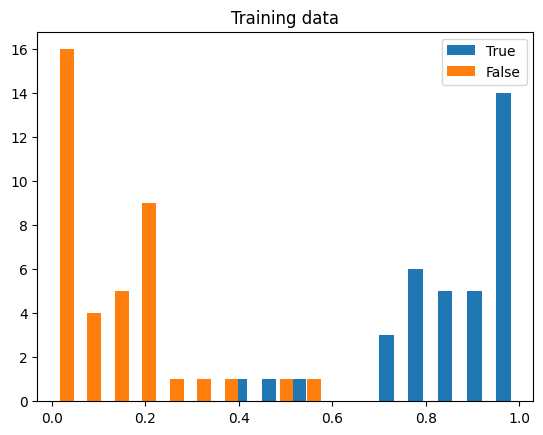

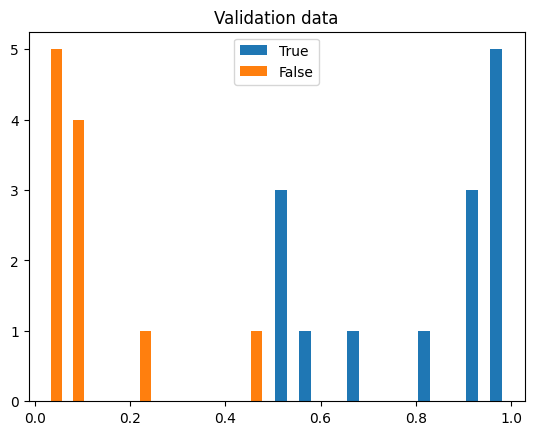

In [69]:
import matplotlib.pyplot as plt
# Orange is false when the label is 0
train_true = y_train == 1

train_probs_true = train_predictions[train_true==True,1]
train_probs_false = train_predictions[train_true==False,1]
        
plt.figure()
plt.title('Training data')
plt.hist(train_probs_true, rwidth=0.5,label='True')
plt.hist(train_probs_false,rwidth=0.5, label='False')
plt.legend()
plt.show()

test_true = y_test == 1

test_probs_true = test_predictions[test_true==True,1]
test_probs_false = test_predictions[test_true==False,1]
        
plt.figure()
plt.title('Validation data')
plt.hist(test_probs_true,rwidth=0.5, label='True')
plt.hist(test_probs_false, rwidth=0.5,label='False')
plt.legend()
plt.show()

In [71]:
# Linear Regression

with open('linear-regression-data.pkl', 'rb') as f:
    data = pickle.load(f)

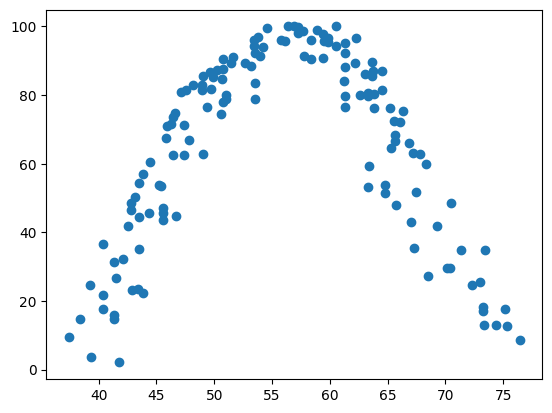

In [80]:
length = data['length']
force = data['force']

plt.figure()
plt.scatter(length, force)
plt.show()

In [77]:
np.random.seed(0)

indices = np.random.permutation(len(length))

X_train = length[indices[:30]]
y_train = force[indices[:30]]

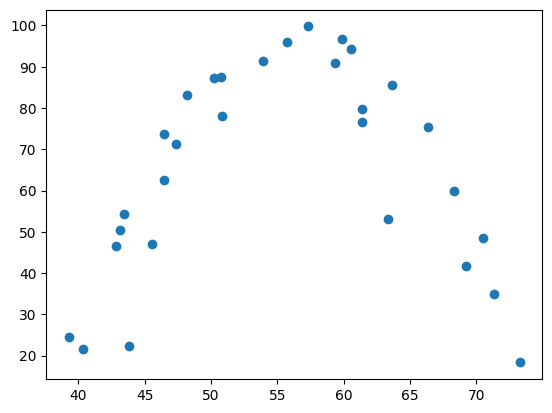

In [82]:
plt.figure()
plt.scatter(X_train, y_train)
plt.show()

In [128]:
def Gaussian(x, mu, sigma):
    return np.exp(-(x - mu) ** 2 / 2 / sigma ** 2)

new_X_train = np.empty((30,10))
new_X_train[:,0] = Gaussian(X_train, 30, 5)
new_X_train[:,1] = Gaussian(X_train, 40, 5)
new_X_train[:,2] = Gaussian(X_train, 50, 5)
new_X_train[:,3] = Gaussian(X_train, 60, 5)
new_X_train[:,4] = Gaussian(X_train, 70, 5)
new_X_train[:,5] = Gaussian(X_train, 80, 5)
new_X_train[:,6] = Gaussian(X_train, 90, 5)
new_X_train[:,7] = Gaussian(X_train, 100, 5)
new_X_train[:,8] = Gaussian(X_train, 110, 5)
new_X_train[:,9] = Gaussian(X_train, 120, 5)

In [129]:
ridge = linear.Ridge()
ridge.fit(new_X_train, y_train)
print(ridge.score(new_X_train,y_train))

0.8050224853522484
